# 1. Bar problem - Matrix Approach

This tutorial will demonstrate the method to solve a typical 1-D bar problem, subjected to axial loading. Instead of the classical SOM approach, Matrix methods are used.



### 1.1. Behaviour of a single Bar element

Consider a horizontally laid bar/truss element having cross-section $A$, Young's Modulus $E$ and length $L$ as shown below. 



For an axial load $P$, the extension/shortening $\delta$ of the bar is 
$$ \delta = \frac{PL}{AE}$$

So for a case where $\delta = 1$, $P = \frac{AE}{L}$

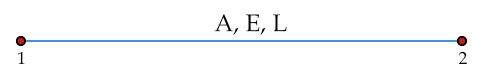

The stiffness matrix $K$ for the above bar element can be found out by assembling the stiffness elements $k_{i,j}$. Where $k_{i,j}$ denotes the force at coordinate $i$ when a unit displacement is given at coordinate $j$

For the bar element under consideration, there are 2 coordinates. So the stiffness matrix $K$ will constitute the terms $k_{1,1}, k_{1,2}, k_{2,1}$ and $k_{2,2}$. These are represented below.  

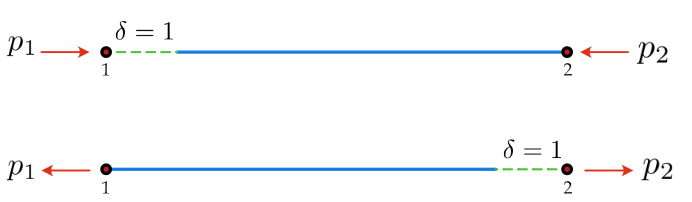

It is obvious from the figures that for both cases of coordinate displacements 

$$p_1 + p_2 = 0 $$

Also since only unit displacements are considered, from the first figure: 
$$ k_{1,1} = p_1 = \frac{AE}{L}$$
$$ k_{2,1} = p_2 = -\frac{AE}{L}$$

From the second figure;
$$ k_{2,2} = p_2 = \frac{AE}{L}$$
$$ k_{1,2} = p_1 = -\frac{AE}{L}$$

Therefore the stiffness matrix becomes 

$$ K = \left[\begin{array}{cc}
\frac{AE}{L} & -\frac{AE}{L} \\
-\frac{AE}{L} & \frac{AE}{L}
\end{array}\right] $$

i.e $$ K =\frac{AE}{L}\left[\begin{array}{cc}
1 & -1 \\
-1 & 1
\end{array}\right] $$

So, for a generic bar element, that may produce displacements $u_1$ and $u_2$ at both the coordinates due to arbitrary forces $p_1$ and/or $p_2$, the equilibrium equation may be written in matrix form as 

$$\left[\begin{array}{c}
p_1\\
p_2
\end{array}\right] = \frac{AE}{L}\left[\begin{array}{cc}
1 & -1 \\
-1 & 1
\end{array}\right]\left[\begin{array}{c}
u_1\\
u_2
\end{array}\right] $$

which is of the form $F = KU$, where $F$ is the external force vector, $K$ is the stiffness matrix and $U$ is the displacement vector for the bar element.

This element stiffness matrix is universal and is one of the defining points of FEM. For any bar element with constant area A in one dimension, the above formula gives the stiffness matrix.

### 1.2 System of Bar elements  

Consider a system as shown consisting of 2 different bar elements, each with it's own properties :
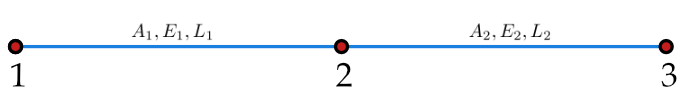

It can be noted that the coordinate/node 2 is common for both the elements. Such an interconnected system needs to be solved as follows :  
1. Discretize/divide the system into different elements
2. Write the equilibrium equation for each of the element (Stiffness matrix, force vector)
3. Form the Global level/System level equilibrium equation from the element-level equations by proper assembly through node connectivities. 
4. Solve the global system equation $K_G U_G = F_G$, the subscript G denoting the quantity at global/system level

Let me demonstrate the procedure for the above 2-element problem

#### Step 1 : 

Seperate both the elements at the common point, i.e coordinate 2 

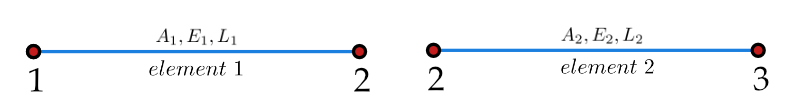

#### Step 2: 

Equilibrium equation for element 1 : $$\left[\begin{array}{c}
p_1\\
p_2
\end{array}\right] = \frac{A_1E_1}{L_1}\left[\begin{array}{cc}
1 & -1 \\
-1 & 1
\end{array}\right]\left[\begin{array}{c}
u_1\\
u_2
\end{array}\right] $$

Equilibrium equation for element 2 : $$\left[\begin{array}{c}
p_2\\
p_3
\end{array}\right] = \frac{A_2E_2}{L_2}\left[\begin{array}{cc}
1 & -1 \\
-1 & 1
\end{array}\right]\left[\begin{array}{c}
u_2\\
u_3
\end{array}\right] $$

For future purpose, both the stiffness matrices are represented using indices of the form $k_{ij}^e$ where $i,j$ represents the coordinates and $e$ represents the element number. 

$\implies$ For element 1, $K_1 = \left[\begin{array}{cc}
k_{11}^1 & k_{12}^1 \\
k_{21}^1 & k_{22}^1 
\end{array}\right]$
Similarly for element 2,  $K_2 = \left[\begin{array}{cc}
k_{22}^2 & k_{23}^2 \\
k_{32}^2 & k_{33}^2
\end{array}\right]$

#### Step 3 : 

As mentioned, the node 2 is common for both the elements. This means that the effect of the node number 2 gets together and acts as a single node when both the elements connected to this node are unified together. 

In other words, even though both the individual elements have equations on the order of 2, the assembled global system will have equations in the order 3, instead of $2+2 = 4$. 

Therefore the global force vector : 
$$F_G = \left[\begin{array}{c}
p_1 \\
p_2\\
p_3
\end{array}\right]$$

Global Displacement vector : 
$$U_G = \left[\begin{array}{c}
u_1 \\
u_2\\
u_3
\end{array}\right]$$

To obtain the global stiffness matrix, which obviously has to be in the size $3 \times 3$, node conectivity is utilized. In a $3 \times 3$ square matrix, the components of element-level stiffness matrices $K_1$ and $K_2$ are arranged according to their coordinate numbers. Components having similar coordinate number gets added and the components whose coordinates do not appear in element-level matrices are given 0 value. This is shown below 

$$K_G = \left[\begin{array}{ccc}
\frac{A_1E_1}{L_1} & -\frac{A_1E_1}{L_1} & 0 \\
-\frac{A_1E_1}{L_1} & \frac{A_1E_1}{L_1} + \frac{A_2E_2}{L_2} & -\frac{A_2E_2}{L_2} \\
0 & -\frac{A_2E_2}{L_2} & \frac{A_2E_2}{L_2}
\end{array}\right] $$

#### Step 4 : 

This step is basically arranging the different global-level matrices obtained in the previous step, and solving for the unknowns after substituting known data such as displacement values, force values etc.. 

$$K_GU_G = F_G$$ 


$$ \implies \left[\begin{array}{ccc}
\frac{A_1E_1}{L_1} & -\frac{A_1E_1}{L_1} & 0 \\
-\frac{A_1E_1}{L_1} & \frac{A_1E_1}{L_1} + \frac{A_2E_2}{L_2} & -\frac{A_2E_2}{L_2} \\
0 & -\frac{A_2E_2}{L_2} & \frac{A_2E_2}{L_2}
\end{array}\right]\left[\begin{array}{c}
u_1 \\
u_2\\
u_3
\end{array}\right] = \left[\begin{array}{c}
p_1 \\
p_2\\
p_3
\end{array}\right]$$

Note: For any particular coordinate/node, both displacement and force values cannot be knowns. 

### 1.3 Solving by example 

Three bars are joined as shown in Figure. The left and right ends are both constrained, i.e. prescribed
displacement is zero at both ends. There is a force of 5 N acting on the middle node. The nodes are numbered starting with the nodes where displacements are prescribed.

(Example 2.1, A First Course in Finite Elements, Fish & Belychko)

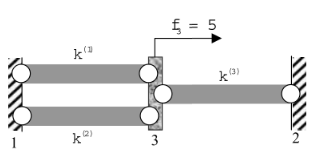